In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
resnet_foca_0 = pd.read_csv("./log/resnet18_focal0.0.csv")
resnet_focal_025 = pd.read_csv("./log/resnet18_focal0.25.csv")
resnet_focal_05 = pd.read_csv("./log/resnet18_focal0.5.csv")
resnet_focal_075 = pd.read_csv("./log/resnet18_focal0.75.csv")
resnet_focal_1 = pd.read_csv("./log/resnet18_focal1.0.csv")
resnet_focal_125 = pd.read_csv("./log/resnet18_focal1.25.csv")
resnet_focal_15 = pd.read_csv("./log/resnet18_focal1.5.csv")
resnet_focal_175 = pd.read_csv("./log/resnet18_focal1.75.csv")
resnet_focal_2 = pd.read_csv("./log/resnet18_focal2.0.csv")

baseline_foca_0 = pd.read_csv("./log/baseline_focal0.0.csv")
baseline_focal_025 = pd.read_csv("./log/baseline_focal0.25.csv")
baseline_focal_05 = pd.read_csv("./log/baseline_focal0.5.csv")
baseline_focal_075 = pd.read_csv("./log/baseline_focal0.75.csv")
baseline_focal_1 = pd.read_csv("./log/baseline_focal1.0.csv")
baseline_focal_125 = pd.read_csv("./log/baseline_focal1.25.csv")
baseline_focal_15 = pd.read_csv("./log/baseline_focal1.5.csv")
baseline_focal_175 = pd.read_csv("./log/baseline_focal1.75.csv")
baseline_focal_2 = pd.read_csv("./log/baseline_focal2.0.csv")

In [3]:
def final_metric_values(metric_log: [], metric: str) -> float:
    """
    This function will return the final metric value list of metric log lilst
    :[pd.DataFrame] metric_log: Metric log data list
    :str metric: Metric ["acc", "f1score"]
    :return: final metric value of metric log
    """
    match metric:
        case "acc":
            return [table["acc"].iloc[-1] for table in metric_log]
        case "f1score":
            return [table["f1score_macro"].iloc[-1] for table in metric_log]
        case _:
            raise Exception("Unexpected metric value")
            

In [4]:
x = np.arange(0, 2.1, 0.25)
y_acc = final_metric_values([resnet_foca_0, resnet_focal_025, 
                             resnet_focal_05, resnet_focal_075, 
                             resnet_focal_1, resnet_focal_125, 
                             resnet_focal_15, resnet_focal_175, 
                             resnet_focal_2], "acc")
y_f1score = final_metric_values([resnet_foca_0, resnet_focal_025, 
                             resnet_focal_05, resnet_focal_075, 
                             resnet_focal_1, resnet_focal_125, 
                             resnet_focal_15, resnet_focal_175, 
                             resnet_focal_2], "f1score")

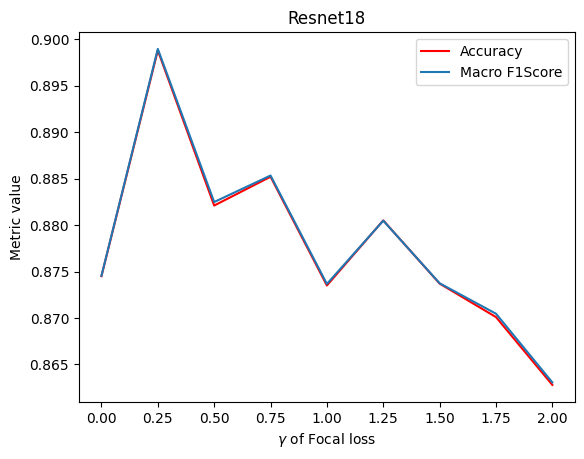

In [5]:
fig, ax = plt.subplots()
ax.plot(x, y_acc, color="red", label="Accuracy")
ax.plot(x, y_f1score, label="Macro F1Score")
plt.xlabel(r"$\gamma$ of Focal loss")
plt.ylabel(r"Metric value")
plt.legend()
plt.title("Resnet18")
plt.savefig("resnet18_gamma_factor.pdf")

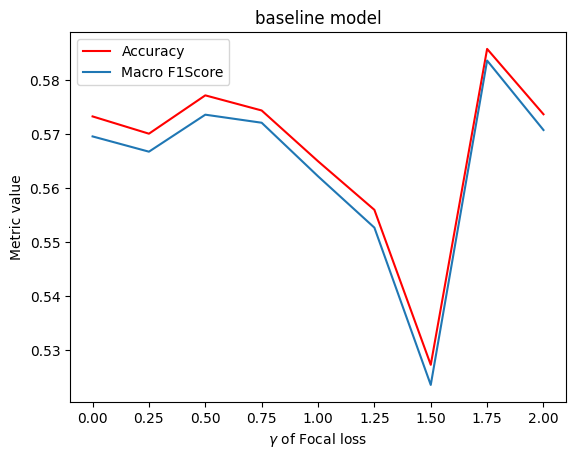

In [6]:
y_acc = final_metric_values([baseline_foca_0, baseline_focal_025, 
                             baseline_focal_05, baseline_focal_075, 
                             baseline_focal_1, baseline_focal_125, 
                             baseline_focal_15, baseline_focal_175, 
                             baseline_focal_2], "acc")
y_f1score = final_metric_values([baseline_foca_0, baseline_focal_025, 
                             baseline_focal_05, baseline_focal_075, 
                             baseline_focal_1, baseline_focal_125, 
                             baseline_focal_15, baseline_focal_175, 
                             baseline_focal_2], "f1score")

fig, ax = plt.subplots()
ax.plot(x, y_acc, color="red", label="Accuracy")
ax.plot(x, y_f1score, label="Macro F1Score")
plt.xlabel(r"$\gamma$ of Focal loss")
plt.ylabel(r"Metric value")
plt.legend()
plt.title("baseline model")
plt.savefig("baseline_gamma_factor.pdf")